# <font color = 'orange'> 1. Introduction </font>


### 📌1.1 Importer les libraries

In [1]:
from functions import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans
from sklearn import decomposition

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale





#from datetime import datetime
#from datetime import date

### 📌1.2 Importer les DataFrame

In [2]:
pop = pd.read_csv('population de chaque pays(2017 et 2012).csv')
alim = pd.read_csv('disponibilités alimentaires.csv')
alim_anim = pd.read_csv('disponibilités alimentaires(origin animal).csv')
pib = pd.read_csv('PIB par habitant.csv')
vol = pd.read_csv('disponibilités alimentaires(volailles).csv')

# <font color = 'orange'> 2. Aperçu </font>


### 📌2.1 Population

In [3]:
pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,31161.376,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,52832.658,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,2914.096,X,Sources internationales sûres,NaN


In [4]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            474 non-null    object 
 1   Domaine                 474 non-null    object 
 2   Code zone (FAO)         474 non-null    int64  
 3   Zone                    474 non-null    object 
 4   Code Élément            474 non-null    int64  
 5   Élément                 474 non-null    object 
 6   Code Produit            474 non-null    int64  
 7   Produit                 474 non-null    object 
 8   Code année              474 non-null    int64  
 9   Année                   474 non-null    int64  
 10  Unité                   474 non-null    object 
 11  Valeur                  474 non-null    float64
 12  Symbole                 474 non-null    object 
 13  Description du Symbole  474 non-null    object 
 14  Note                    4 non-null      ob

In [5]:
pop.describe(include='object')

,Code Domaine,Domaine,Zone,Élément,Produit,Unité,Symbole,Description du Symbole,Note
count,474,474,474,474,474,474,474,474,4
unique,1,1,237,1,1,1,2,2,1
top,OA,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,1000 personnes,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,474,474,2,474,474,474,470,470,4


In [6]:
pop['Symbole'].unique()

array(['X', 'A'], dtype=object)

In [7]:
pop[pop['Symbole'] == 'A']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
18,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,260.348,A,"Agrégat, peut inclure des données officielles,...",NaN
19,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,275.186,A,"Agrégat, peut inclure des données officielles,...",NaN
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,1415164.184,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1452625.244,A,"Agrégat, peut inclure des données officielles,...",NaN


In [8]:
pop.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      470
dtype: int64

In [9]:
pop['Note'].value_counts()

UNDESA, Population Division – World Population Prospects, the 2017 Revision    4
Name: Note, dtype: int64

In [10]:
pop[pop['Note'] == 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
158,OA,Séries temporelles annuelles,85,Groenland,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,56.470,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
392,OA,Séries temporelles annuelles,94,Saint-Siège,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,0.804,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
444,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,1.167,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
445,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1.300,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [11]:
pop.Zone.unique().shape

(237,)

<AxesSubplot:>

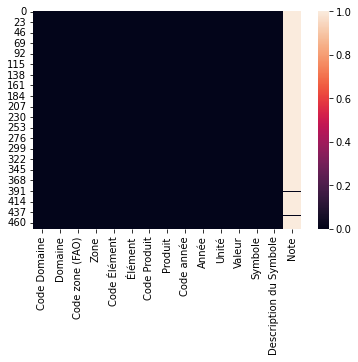

In [12]:
sns.heatmap(pop.isna())

### 📌2.2 Alimentaire


In [13]:
alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée


In [14]:
alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99784 entries, 0 to 99783
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            99784 non-null  object 
 1   Domaine                 99784 non-null  object 
 2   Code zone (FAO)         99784 non-null  int64  
 3   Zone                    99784 non-null  object 
 4   Code Élément            99784 non-null  int64  
 5   Élément                 99784 non-null  object 
 6   Code Produit            99784 non-null  int64  
 7   Produit                 99784 non-null  object 
 8   Code année              99784 non-null  int64  
 9   Année                   99784 non-null  int64  
 10  Unité                   99784 non-null  object 
 11  Valeur                  99784 non-null  float64
 12  Symbole                 99784 non-null  object 
 13  Description du Symbole  99784 non-null  object 
dtypes: float64(1), int64(5), object(8)
mem

In [15]:
alim.nunique()

Code Domaine                 1
Domaine                      1
Code zone (FAO)            176
Zone                       176
Code Élément                 7
Élément                      7
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7446
Symbole                      4
Description du Symbole       4
dtype: int64

In [16]:
alim.Unité.unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [17]:
alim.Symbole.unique()

array(['Im', 'S', 'Fc', 'A'], dtype=object)

In [18]:
alim["Description du Symbole"].unique()

array(["Données de la FAO basées sur une méthodologie d'imputation",
       'Données standardisées', 'Donnée calculée',
       'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées'],
      dtype=object)

In [19]:
alim[alim["Symbole"] == 'Im'].head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,Im,Données de la FAO basées sur une méthodologie ...
7,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2807,Riz et produits,2017,2017,Milliers de tonnes,338.0,Im,Données de la FAO basées sur une méthodologie ...
8,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2807,Riz et produits,2017,2017,Milliers de tonnes,495.0,Im,Données de la FAO basées sur une méthodologie ...


In [20]:
alim[alim["Symbole"] == 'S'].head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.0,S,Données standardisées
10,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2807,Riz et produits,2017,2017,Milliers de tonnes,681.0,S,Données standardisées
17,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2513,Orge et produits,2017,2017,Milliers de tonnes,140.0,S,Données standardisées
24,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2514,Maïs et produits,2017,2017,Milliers de tonnes,213.0,S,Données standardisées
31,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2515,Seigle et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées


In [21]:
alim[alim["Symbole"] == 'Fc'].head()


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée
5,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé et produits,2017,2017,Kcal/personne/jour,1358.00,Fc,Donnée calculée
6,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2511,Blé et produits,2017,2017,g/personne/jour,36.53,Fc,Donnée calculée
11,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2807,Riz et produits,2017,2017,kg,17.80,Fc,Donnée calculée
12,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2807,Riz et produits,2017,2017,Kcal/personne/jour,123.00,Fc,Donnée calculée


In [22]:
alim[alim["Symbole"] == 'A'].head()


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
17884,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,134662.0,A,"Agrégat, peut inclure des données officielles,..."
17885,FBS,Bilans Alimentaires (2014-),351,Chine,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,6849.0,A,"Agrégat, peut inclure des données officielles,..."
17886,FBS,Bilans Alimentaires (2014-),351,Chine,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,774.0,A,"Agrégat, peut inclure des données officielles,..."
17887,FBS,Bilans Alimentaires (2014-),351,Chine,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,124007.0,A,"Agrégat, peut inclure des données officielles,..."
17891,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2807,Riz et produits,2017,2017,Milliers de tonnes,214430.0,A,"Agrégat, peut inclure des données officielles,..."


<AxesSubplot:>

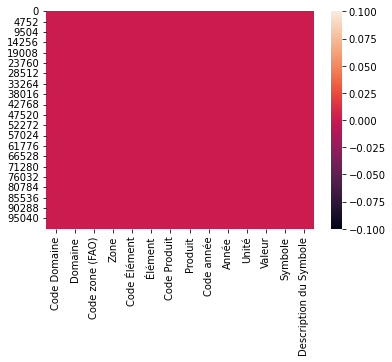

In [23]:
sns.heatmap(alim.isna())

### 📌2.3 Alimentaire(origine animale)


In [24]:
alim_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,11.14,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,465.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,35.29,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,1043.00,Fc,Donnée calculée


In [25]:
alim_anim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            346 non-null    object 
 1   Domaine                 346 non-null    object 
 2   Code zone (FAO)         346 non-null    int64  
 3   Zone                    346 non-null    object 
 4   Code Élément            346 non-null    int64  
 5   Élément                 346 non-null    object 
 6   Code Produit            346 non-null    int64  
 7   Produit                 346 non-null    object 
 8   Code année              346 non-null    int64  
 9   Année                   346 non-null    int64  
 10  Unité                   346 non-null    object 
 11  Valeur                  346 non-null    float64
 12  Symbole                 346 non-null    object 
 13  Description du Symbole  346 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [26]:
alim_anim.duplicated().any()

False

In [27]:
alim_anim.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           173
Zone                      173
Code Élément                2
Élément                     2
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       2
Valeur                    331
Symbole                     1
Description du Symbole      1
dtype: int64

In [28]:
alim_anim.Symbole.unique()

array(['Fc'], dtype=object)

In [29]:
alim_anim.Unité.unique()

array(['Kcal/personne/jour', 'g/personne/jour'], dtype=object)

In [30]:
alim_anim.Zone.unique().shape

(173,)

<AxesSubplot:>

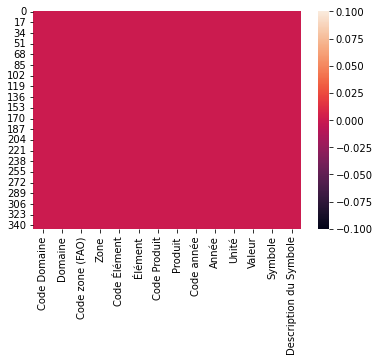

In [31]:
sns.heatmap(alim_anim.isna())

### 📌2.4 PIB (Produit Intérieur Brut)


In [32]:
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,513.085978,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4514.204908,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4109.701336,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44552.061000,X,Sources internationales sûres,NaN


In [33]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            210 non-null    object 
 1   Domaine                 210 non-null    object 
 2   Code zone (FAO)         210 non-null    int64  
 3   Zone                    210 non-null    object 
 4   Code Élément            210 non-null    int64  
 5   Élément                 210 non-null    object 
 6   Code Produit            210 non-null    int64  
 7   Produit                 210 non-null    object 
 8   Code année              210 non-null    int64  
 9   Année                   210 non-null    int64  
 10  Unité                   210 non-null    object 
 11  Valeur                  210 non-null    float64
 12  Symbole                 210 non-null    object 
 13  Description du Symbole  210 non-null    object 
 14  Note                    0 non-null      fl

In [34]:
pib.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           210
Zone                      210
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    210
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [35]:
pib.isna().sum()

Code Domaine                0
Domaine                     0
Code zone (FAO)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      210
dtype: int64

### 📌2.5 Volailles 

In [36]:
vol.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.57,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée


In [37]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            1181 non-null   object 
 1   Domaine                 1181 non-null   object 
 2   Code zone (FAO)         1181 non-null   int64  
 3   Zone                    1181 non-null   object 
 4   Code Élément            1181 non-null   int64  
 5   Élément                 1181 non-null   object 
 6   Code Produit            1181 non-null   int64  
 7   Produit                 1181 non-null   object 
 8   Code année              1181 non-null   int64  
 9   Année                   1181 non-null   int64  
 10  Unité                   1181 non-null   object 
 11  Valeur                  1181 non-null   float64
 12  Symbole                 1181 non-null   object 
 13  Description du Symbole  1181 non-null   object 
dtypes: float64(1), int64(5), object(8)
memor

In [38]:
vol.nunique()

Code Domaine                1
Domaine                     1
Code zone (FAO)           174
Zone                      174
Code Élément                7
Élément                     7
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       4
Valeur                    639
Symbole                     4
Description du Symbole      4
dtype: int64

In [39]:
vol.Symbole.unique()

array(['Im', 'S', 'Fc', 'A'], dtype=object)

# <font color = 'orange'> 3. Nettoyage </font>


### 📌3.1 Population

In [40]:
#Supprimer Chine
pop_aber = pop[pop['Symbole'] == 'A'].index
pop = pop.drop(pop_aber)
pop.describe(include='object')

,Code Domaine,Domaine,Zone,Élément,Produit,Unité,Symbole,Description du Symbole,Note
count,470,470,470,470,470,470,470,470,4
unique,1,1,235,1,1,1,1,1,1
top,OA,Séries temporelles annuelles,Afghanistan,Population totale,Population-Estimations,1000 personnes,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,470,470,2,470,470,470,470,470,4


In [41]:
#Changement de Unité
pop['Unité'] = 'personnes'
pop['Valeur'] = pop['Valeur'] * 1_000
pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,personnes,31161376.0,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,personnes,36296113.0,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,personnes,52832658.0,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,personnes,57009756.0,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,personnes,2914096.0,X,Sources internationales sûres,NaN


In [42]:
pop_aber_2 = pop[pop['Valeur'] < 500_000].index
pop = pop.drop(pop_aber_2)

In [43]:
pop[pop['Valeur'] < 500_000]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


### 📌3.2 Alimentaire

In [44]:
#Supprimer Chine
alim_aber = alim[alim["Zone"] == 'Chine'].index
alim = alim.drop(alim_aber)
alim[alim["Symbole"] == 'A']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


In [45]:
alim.Zone.unique().shape

(175,)

In [46]:
alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Valeur'] = alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
alim.loc[alim['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,tonnes,4281000.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,tonnes,3080000.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,tonnes,2000.00,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,tonnes,7326000.00,S,Données standardisées
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2511,Blé et produits,2017,2017,kg,158.38,Fc,Donnée calculée


In [47]:
alim.Unité.unique()

array(['tonnes', 'kg', 'Kcal/personne/jour', 'g/personne/jour'],
      dtype=object)

### 📌3.3 Alimentaire(origine animale)


In [48]:
#Changement Unité 
alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Valeur'] = alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
alim_anim.loc[alim_anim['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
alim_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,11.14,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,465.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2017,2017,g/personne/jour,35.29,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2017,2017,Kcal/personne/jour,1043.00,Fc,Donnée calculée


In [49]:
alim_anim.Unité.unique()

array(['Kcal/personne/jour', 'g/personne/jour'], dtype=object)

In [50]:
alim_anim.Zone.unique().shape

(173,)

### 📌3.4 Volailles 


In [51]:
#Changement Unité 
vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Valeur'] = vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1_000
vol.loc[vol['Unité'] == 'Milliers de tonnes', 'Unité']  = 'tonnes'
vol.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,tonnes,28000.00,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,29000.00,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,tonnes,57000.00,S,Données standardisées
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.57,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée


In [52]:
vol[vol["Symbole"] == 'A']


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
212,FBS,Bilans Alimentaires (2014-),351,Chine,5511,Production,2734,Viande de Volailles,2017,2017,tonnes,20069000.0,A,"Agrégat, peut inclure des données officielles,..."
213,FBS,Bilans Alimentaires (2014-),351,Chine,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,1543000.0,A,"Agrégat, peut inclure des données officielles,..."
214,FBS,Bilans Alimentaires (2014-),351,Chine,5911,Exportations - Quantité,2734,Viande de Volailles,2017,2017,tonnes,1248000.0,A,"Agrégat, peut inclure des données officielles,..."
215,FBS,Bilans Alimentaires (2014-),351,Chine,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,tonnes,20092000.0,A,"Agrégat, peut inclure des données officielles,..."


In [53]:
#Supprimer symbol Chine
vol_aber = vol[vol["Zone"] == 'Chine'].index
vol = vol.drop(vol_aber)
vol[vol["Zone"] == 'Chine']

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


# <font color = 'orange'> 4. Transformation </font>


### 📌4.1 Population

In [54]:
#Cree les df separement
pop_2017 = pop[pop['Année'] == 2017]
pop_2012 = pop[pop['Année'] == 2012]
pop_2017.Zone.unique().shape

(172,)

In [55]:
#Jointure les 2017 et 2012
pop_var = pd.merge(pop_2017[['Zone','Unité', 'Valeur']], pop_2012[['Zone', 'Valeur']], on="Zone",how = 'inner')
#Renomer
pop_var.rename(columns = {'Valeur_x':'pop_2017', 'Valeur_y':'pop_2012','Année_x':'Année_2017', 'Année_y':'Année_2012'}, inplace= True)
pop_var.head()

,Zone,Unité,pop_2017,pop_2012
0,Afghanistan,personnes,36296113.0,31161376.0
1,Afrique du Sud,personnes,57009756.0,52832658.0
2,Albanie,personnes,2884169.0,2914096.0
3,Algérie,personnes,41389189.0,37383895.0
4,Allemagne,personnes,82658409.0,80972628.0


In [56]:
pop_var['var_pop'] = pop_var['pop_2017'] - pop_var['pop_2012']
pop_var['var_pop_%'] = (pop_var['var_pop'] / pop_var['pop_2017'] ) * 100
pop_var

,Zone,Unité,pop_2017,pop_2012,var_pop,var_pop_%
0,Afghanistan,personnes,36296113.0,31161376.0,5134737.0,14.146796
1,Afrique du Sud,personnes,57009756.0,52832658.0,4177098.0,7.326988
2,Albanie,personnes,2884169.0,2914096.0,-29927.0,-1.037630
3,Algérie,personnes,41389189.0,37383895.0,4005294.0,9.677150
4,Allemagne,personnes,82658409.0,80972628.0,1685781.0,2.039455
...,...,...,...,...,...,...
166,Venezuela (République bolivarienne du),personnes,29402484.0,29360837.0,41647.0,0.141644
167,Viet Nam,personnes,94600648.0,89801926.0,4798722.0,5.072610
168,Yémen,personnes,27834819.0,24473178.0,3361641.0,12.077107
169,Zambie,personnes,16853599.0,14465150.0,2388449.0,14.171745


<AxesSubplot:>

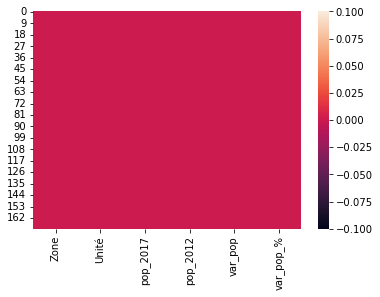

In [57]:
sns.heatmap(pop_var.isna())

### 📌4.2 Alimentaire

In [58]:
#table = pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)

alim_1 = pd.pivot_table(alim, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
alim_1.reset_index(inplace=True)
alim_1.head()

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Abats Comestible,5.0,1.60,0.71,61000.0,NaN,6000.0,55000.0
1,Afghanistan,"Agrumes, Autres",1.0,1.36,0.02,51000.0,0.0,33000.0,18000.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Afghanistan,Aliments pour enfants,1.0,0.06,0.03,2000.0,NaN,4000.0,NaN
4,Afghanistan,Ananas et produits,0.0,0.02,0.00,1000.0,0.0,1000.0,0.0


In [59]:
alim_1[np.isnan(alim_1['Production'])]

Élément,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
3,Afghanistan,Aliments pour enfants,1.0,0.06,0.03,2000.0,NaN,4000.0,NaN
8,Afghanistan,Bananes plantains,0.0,0.00,0.00,0.0,NaN,0.0,NaN
23,Afghanistan,Girofles,0.0,0.00,0.00,0.0,0.0,0.0,NaN
42,Afghanistan,Ignames,NaN,NaN,NaN,-1000.0,1000.0,NaN,NaN
46,Afghanistan,Manioc et produits,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16229,Îles Salomon,Thé,0.0,0.18,0.05,0.0,NaN,0.0,NaN
16230,Îles Salomon,Tomates et produits,0.0,0.03,0.00,0.0,NaN,0.0,NaN
16231,Îles Salomon,Viande d'Ovins/Caprins,1.0,0.08,0.03,0.0,NaN,0.0,NaN
16235,Îles Salomon,"Viande, Autre",0.0,0.01,0.00,0.0,NaN,0.0,NaN


In [60]:
alim_group =alim_1.groupby('Zone').sum()
alim_group.reset_index(inplace=True)
alim_group.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'kcal_hab',
                           'Disponibilité de protéines en quantité (g/personne/jour)':'kprot_hab'}, inplace=True)
alim_group



Élément,Zone,kcal_hab,Disponibilité alimentaire en quantité (kg/personne/an),kprot_hab,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2048.0,353.96,56.18,16165000.0,628000.0,6190000.0,11568000.0
1,Afrique du Sud,2934.0,540.99,83.62,61839000.0,11302910.0,8612840.0,67779050.0
2,Albanie,3389.0,1177.29,118.12,4885070.0,164020.0,776400.0,4235700.0
3,Algérie,3340.0,758.44,92.81,43404710.0,746270.0,18027150.0,27433830.0
4,Allemagne,3545.0,841.56,103.82,175265000.0,51989620.0,64024210.0,166934410.0
...,...,...,...,...,...,...,...,...
170,Émirats arabes unis,3341.0,640.86,112.79,11755180.0,5395410.0,15725740.0,1761870.0
171,Équateur,2597.0,563.08,66.46,23431000.0,8759190.0,2110290.0,29975900.0
172,États-Unis d'Amérique,3774.0,963.21,113.10,830377650.0,195680410.0,82992780.0,947010270.0
173,Éthiopie,2332.0,357.02,66.23,53351360.0,1287890.0,2967120.0,53322130.0


<AxesSubplot:xlabel='Élément'>

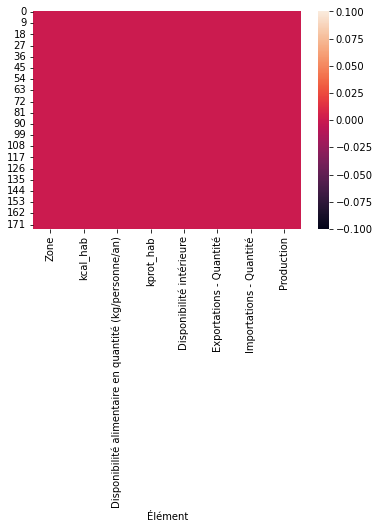

In [61]:
sns.heatmap(alim_group.isna())

### 📌4.3 Alimentaire(origine animale)


In [62]:
alim_anim_1 = pd.pivot_table(alim_anim, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
alim_anim_1.head()

,Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,Produit,,
Afghanistan,Produits Animaux,195.0,11.14
Afrique du Sud,Produits Animaux,465.0,35.29
Albanie,Produits Animaux,1043.0,64.08
Algérie,Produits Animaux,421.0,26.71
Allemagne,Produits Animaux,1070.0,62.77


In [63]:
alim_anim_group=alim_anim_1.groupby('Zone').sum()
alim_anim_group.reset_index(inplace=True)
alim_anim_group

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,195.0,11.14
1,Afrique du Sud,465.0,35.29
2,Albanie,1043.0,64.08
3,Algérie,421.0,26.71
4,Allemagne,1070.0,62.77
...,...,...,...
168,Émirats arabes unis,704.0,51.54
169,Équateur,528.0,30.84
170,États-Unis d'Amérique,1026.0,73.30
171,Éthiopie,103.0,6.62


<AxesSubplot:xlabel='Élément'>

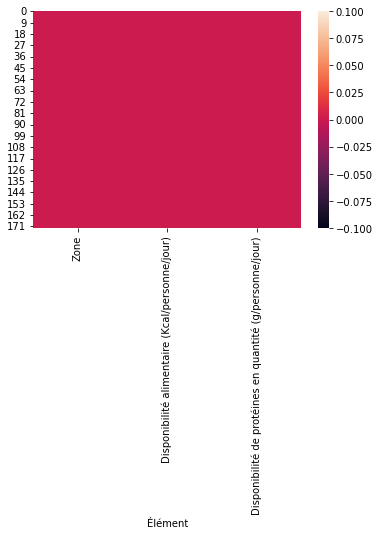

In [64]:
sns.heatmap(alim_anim_group.isna())

### 📌4.4 proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays

In [65]:
#Jointure prot total et prot anim
prot_total_anim = pd.merge(alim_group[['Zone','kprot_hab']], alim_anim_group[['Zone', 'Disponibilité de protéines en quantité (g/personne/jour)']], on="Zone",how = 'inner')
#Renemer
prot_total_anim.rename(columns = {'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo_prot_Animal'}, inplace = True)
#Colonne %
prot_total_anim['proportion_prot_total_anim'] = (prot_total_anim['Dispo_prot_Animal'] / prot_total_anim['kprot_hab']) * 100
prot_total_anim

Élément,Zone,kprot_hab,Dispo_prot_Animal,proportion_prot_total_anim
0,Afghanistan,56.18,11.14,19.829121
1,Afrique du Sud,83.62,35.29,42.202822
2,Albanie,118.12,64.08,54.249915
3,Algérie,92.81,26.71,28.779226
4,Allemagne,103.82,62.77,60.460412
...,...,...,...,...
167,Émirats arabes unis,112.79,51.54,45.695540
168,Équateur,66.46,30.84,46.403852
169,États-Unis d'Amérique,113.10,73.30,64.809903
170,Éthiopie,66.23,6.62,9.995470


<AxesSubplot:xlabel='Élément'>

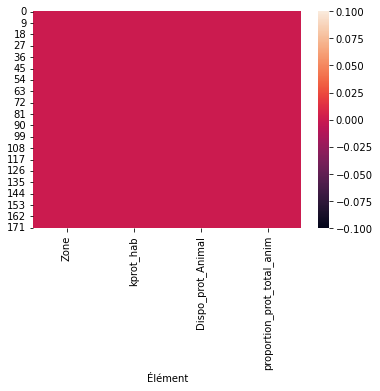

In [66]:
sns.heatmap(prot_total_anim.isna())

In [67]:
prot_total_anim[np.isnan(prot_total_anim['proportion_prot_total_anim'])]

Élément,Zone,kprot_hab,Dispo_prot_Animal,proportion_prot_total_anim


In [68]:
prot_total_anim.replace( np.nan , 0.0 , inplace = True) 

<AxesSubplot:xlabel='Élément'>

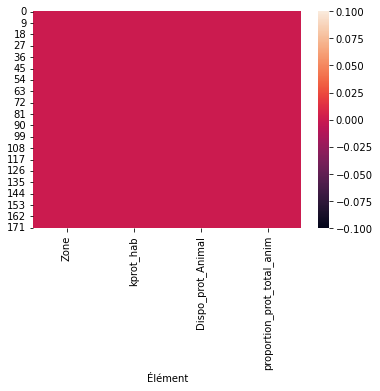

In [69]:
#Verification des NaN
sns.heatmap(prot_total_anim.isna())

### 📌4.5 Disponibilité alimentaire en protéines et disponibilité alimentaire en calories par habitant.

In [70]:
#pop_prot = pd.merge(pop_2017[['Zone', 'Valeur']], )

In [71]:
prot_total_pop = pd.merge(alim_1[['Zone','Produit','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)']], pop_2017[['Zone', 'Valeur']], on="Zone",how = 'inner')
prot_total_pop

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
0,Afghanistan,Abats Comestible,5.0,0.71,36296113.0
1,Afghanistan,"Agrumes, Autres",1.0,0.02,36296113.0
2,Afghanistan,"Alcool, non Comestible",NaN,NaN,36296113.0
3,Afghanistan,Aliments pour enfants,1.0,0.03,36296113.0
4,Afghanistan,Ananas et produits,0.0,0.00,36296113.0
...,...,...,...,...,...
14599,Îles Salomon,Viande de Volailles,19.0,1.55,636039.0
14600,Îles Salomon,Viande de porcins,43.0,1.34,636039.0
14601,Îles Salomon,"Viande, Autre",0.0,0.00,636039.0
14602,Îles Salomon,Vin,0.0,0.00,636039.0


In [72]:
prot_total_pop.isnull().sum()

Zone                                                           0
Produit                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              1456
Disponibilité de protéines en quantité (g/personne/jour)    1435
Valeur                                                         0
dtype: int64

In [73]:
#Remplacer NaN par 0.0
prot_total_pop.replace( np.nan , 0.0 , inplace = True) 

In [74]:
prot_total_pop.isna().sum()

Zone                                                        0
Produit                                                     0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Valeur                                                      0
dtype: int64

In [75]:
prot_total_pop.groupby('Zone').sum()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
Zone,,,
Afghanistan,2048.0,56.18,3.157762e+09
Afrique du Sud,2934.0,83.62,5.415927e+09
Albanie,3389.0,118.12,2.653435e+08
Algérie,3340.0,92.81,3.766416e+09
Allemagne,3545.0,103.82,7.852549e+09
...,...,...,...
Émirats arabes unis,3341.0,112.79,9.012843e+08
Équateur,2597.0,66.46,1.628180e+09
États-Unis d'Amérique,3774.0,113.10,3.088305e+10


In [76]:
#Ajouter colonnes kprot et kcal par habitats
#prot_total_pop['kcal_hab'] = prot_total_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * prot_total_pop['Valeur']
#prot_total_pop['kprot_hab'] = prot_total_pop['Disponibilité de protéines en quantité (g/personne/jour)'] * prot_total_pop['Valeur']
#prot_total_pop

In [77]:
prot_total_pop_group = prot_total_pop.groupby('Zone').sum()
prot_total_pop_group.reset_index(inplace=True)
prot_total_pop_group

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Valeur
0,Afghanistan,2048.0,56.18,3.157762e+09
1,Afrique du Sud,2934.0,83.62,5.415927e+09
2,Albanie,3389.0,118.12,2.653435e+08
3,Algérie,3340.0,92.81,3.766416e+09
4,Allemagne,3545.0,103.82,7.852549e+09
...,...,...,...,...
151,Émirats arabes unis,3341.0,112.79,9.012843e+08
152,Équateur,2597.0,66.46,1.628180e+09
153,États-Unis d'Amérique,3774.0,113.10,3.088305e+10
154,Éthiopie,2332.0,66.23,1.032079e+10


### 📌4.6 Volailles 


In [78]:
vol_1 = pd.pivot_table(vol, values='Valeur', columns=['Élément'], index = ['Zone','Produit'] )
vol_1.reset_index(inplace=True)
vol_1.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'disp_kcal_vol(pers)',
                      'Disponibilité de protéines en quantité (g/personne/jour)':'dispo_prot_vol(pers)',
                      'Disponibilité alimentaire en quantité (kg/personne/an)':'dispo_kg_vol(pers)',
                     'Disponibilité intérieure':'dispo_int_vol',
                     'Exportations - Quantité':'Exportations_vol',
                     'Importations - Quantité':'Importations_vol',
                     'Production':'Production_vol'}, inplace=True)
vol_1.head()

Élément,Zone,Produit,disp_kcal_vol(pers),dispo_kg_vol(pers),dispo_prot_vol(pers),dispo_int_vol,Exportations_vol,Importations_vol,Production_vol
0,Afghanistan,Viande de Volailles,5.0,1.57,0.56,57000.0,NaN,29000.0,28000.0
1,Afrique du Sud,Viande de Volailles,149.0,37.14,14.68,2116000.0,63000.0,514000.0,1665000.0
2,Albanie,Viande de Volailles,59.0,11.45,4.44,33000.0,0.0,20000.0,13000.0
3,Algérie,Viande de Volailles,25.0,7.35,2.26,304000.0,0.0,2000.0,297000.0
4,Allemagne,Viande de Volailles,67.0,18.05,7.39,1557000.0,646000.0,842000.0,1514000.0


In [79]:
vol_1.isna().sum()

Élément
Zone                     0
Produit                  0
disp_kcal_vol(pers)      0
dispo_kg_vol(pers)       0
dispo_prot_vol(pers)     0
dispo_int_vol            0
Exportations_vol        34
Importations_vol         1
Production_vol           2
dtype: int64

In [80]:
#Remplacer NaN colonne importation par 0.0
vol_1.Importations_vol = np.where(np.isnan(vol_1.Importations_vol), 0, vol_1.Importations_vol)
vol_1.Production_vol = np.where(np.isnan(vol_1.Production_vol), 0, vol_1.Production_vol)

vol_1.isna().sum()

Élément
Zone                     0
Produit                  0
disp_kcal_vol(pers)      0
dispo_kg_vol(pers)       0
dispo_prot_vol(pers)     0
dispo_int_vol            0
Exportations_vol        34
Importations_vol         0
Production_vol           0
dtype: int64

In [81]:
#Ajouter colonne le taux de dépendance aux importations
vol_1['dep_import_vol'] = (vol_1['Importations_vol'] / vol_1['dispo_int_vol']) * 100
#Ajouter colonne le taux d'autosuffisance exprime l'importance de la production
vol_1['autosuff_vol'] = (vol_1['Production_vol'] / vol_1['dispo_int_vol']) * 100

vol_1.head()

Élément,Zone,Produit,disp_kcal_vol(pers),dispo_kg_vol(pers),dispo_prot_vol(pers),dispo_int_vol,Exportations_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
0,Afghanistan,Viande de Volailles,5.0,1.57,0.56,57000.0,NaN,29000.0,28000.0,50.877193,49.122807
1,Afrique du Sud,Viande de Volailles,149.0,37.14,14.68,2116000.0,63000.0,514000.0,1665000.0,24.291115,78.686200
2,Albanie,Viande de Volailles,59.0,11.45,4.44,33000.0,0.0,20000.0,13000.0,60.606061,39.393939
3,Algérie,Viande de Volailles,25.0,7.35,2.26,304000.0,0.0,2000.0,297000.0,0.657895,97.697368
4,Allemagne,Viande de Volailles,67.0,18.05,7.39,1557000.0,646000.0,842000.0,1514000.0,54.078356,97.238279


### 📌4.7 Jointure DataFrame final

In [82]:
#df pop et anim
df_1 = pd.merge(alim_group[['Zone','kcal_hab','kprot_hab']],prot_total_anim[['Zone', 'proportion_prot_total_anim']], on='Zone', how='inner')
df_1

Élément,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim
0,Afghanistan,2048.0,56.18,19.829121
1,Afrique du Sud,2934.0,83.62,42.202822
2,Albanie,3389.0,118.12,54.249915
3,Algérie,3340.0,92.81,28.779226
4,Allemagne,3545.0,103.82,60.460412
...,...,...,...,...
167,Émirats arabes unis,3341.0,112.79,45.695540
168,Équateur,2597.0,66.46,46.403852
169,États-Unis d'Amérique,3774.0,113.10,64.809903
170,Éthiopie,2332.0,66.23,9.995470


In [83]:
#df pop variation et df1
df_2 = pd.merge(df_1, pop_var[['Zone','pop_2017', 'var_pop_%']], on='Zone', how = 'inner')
df_2

,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%
0,Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796
1,Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988
2,Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630
3,Algérie,3340.0,92.81,28.779226,41389189.0,9.677150
4,Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455
...,...,...,...,...,...,...
149,Émirats arabes unis,3341.0,112.79,45.695540,9487203.0,3.642876
150,Équateur,2597.0,66.46,46.403852,16785361.0,7.811926
151,États-Unis d'Amérique,3774.0,113.10,64.809903,325084756.0,3.396305
152,Éthiopie,2332.0,66.23,9.995470,106399924.0,12.850516


In [84]:
#df2 et df PIB
df_3 = pd.merge(df_2, pib[['Zone','Valeur']], on='Zone', how='inner' )
df_3.rename(columns={'Valeur':'PIB_hab_usd'}, inplace=True)
df_3

,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd
0,Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796,513.085978
1,Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988,6121.876572
2,Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630,4514.204908
3,Algérie,3340.0,92.81,28.779226,41389189.0,9.677150,4109.701336
4,Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455,44552.061000
...,...,...,...,...,...,...,...
148,Émirats arabes unis,3341.0,112.79,45.695540,9487203.0,3.642876,40644.804043
149,Équateur,2597.0,66.46,46.403852,16785361.0,7.811926,6213.501276
150,États-Unis d'Amérique,3774.0,113.10,64.809903,325084756.0,3.396305,60116.568493
151,Éthiopie,2332.0,66.23,9.995470,106399924.0,12.850516,721.753494


In [85]:
df = pd.merge(df_3, vol_1[['Zone', 'dispo_int_vol', 'Importations_vol', 'Production_vol', 'dep_import_vol', 'autosuff_vol']], on='Zone', how = 'inner')
df

,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
0,Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807
1,Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200
2,Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939
3,Algérie,3340.0,92.81,28.779226,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368
4,Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,3341.0,112.79,45.695540,9487203.0,3.642876,40644.804043,480000.0,465000.0,47000.0,96.875000,9.791667
149,Équateur,2597.0,66.46,46.403852,16785361.0,7.811926,6213.501276,340000.0,0.0,340000.0,0.000000,100.000000
150,États-Unis d'Amérique,3774.0,113.10,64.809903,325084756.0,3.396305,60116.568493,18305000.0,123000.0,21914000.0,0.671948,119.715925
151,Éthiopie,2332.0,66.23,9.995470,106399924.0,12.850516,721.753494,72000.0,1000.0,71000.0,1.388889,98.611111


In [86]:
df.corr()

,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
kcal_hab,1.000000,0.898926,0.688793,0.029851,-0.479221,0.614394,0.246084,0.284399,0.245479,0.002118,0.148801
kprot_hab,0.898926,1.000000,0.738973,0.019297,-0.493105,0.644623,0.219221,0.306951,0.213989,0.068629,0.106631
proportion_prot_total_anim,0.688793,0.738973,1.000000,-0.076394,-0.573089,0.669670,0.161913,0.285923,0.170310,0.163186,0.060470
pop_2017,0.029851,0.019297,-0.076394,1.000000,-0.043384,-0.043187,0.665449,0.141247,0.627641,-0.172381,0.089847
var_pop_%,-0.479221,-0.493105,-0.573089,-0.043384,1.000000,-0.233667,-0.122973,-0.131031,-0.130822,0.048895,-0.229448
PIB_hab_usd,0.614394,0.644623,0.669670,-0.043187,-0.233667,1.000000,0.125224,0.285365,0.130057,0.177213,0.067782
dispo_int_vol,0.246084,0.219221,0.161913,0.665449,-0.122973,0.125224,1.000000,0.251245,0.988994,-0.178349,0.097629
Importations_vol,0.284399,0.306951,0.285923,0.141247,-0.131031,0.285365,0.251245,1.000000,0.185995,0.304267,-0.010817
Production_vol,0.245479,0.213989,0.170310,0.627641,-0.130822,0.130057,0.988994,0.185995,1.000000,-0.178817,0.138362
dep_import_vol,0.002118,0.068629,0.163186,-0.172381,0.048895,0.177213,-0.178349,0.304267,-0.178817,1.000000,-0.289413


<AxesSubplot:>

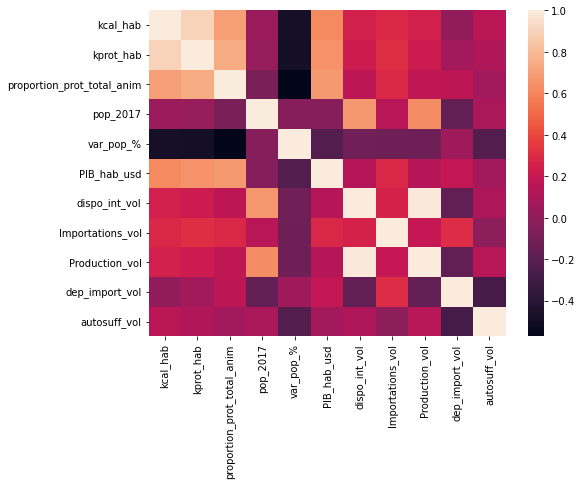

In [87]:
# voir les correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

In [88]:
#sns.pairplot(df)

In [89]:
#df.hist(figsize=(20,12))

In [90]:
#Mettre la coloone Zone pour index
df.set_index('Zone',inplace = True)
df

,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol
Zone,,,,,,,,,,,
Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807
Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200
Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939
Algérie,3340.0,92.81,28.779226,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368
Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3341.0,112.79,45.695540,9487203.0,3.642876,40644.804043,480000.0,465000.0,47000.0,96.875000,9.791667
Équateur,2597.0,66.46,46.403852,16785361.0,7.811926,6213.501276,340000.0,0.0,340000.0,0.000000,100.000000
États-Unis d'Amérique,3774.0,113.10,64.809903,325084756.0,3.396305,60116.568493,18305000.0,123000.0,21914000.0,0.671948,119.715925


<AxesSubplot:ylabel='Zone'>

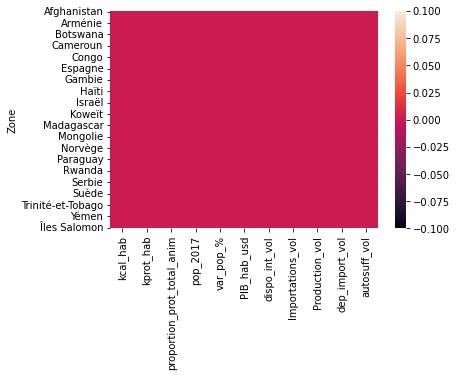

In [91]:
sns.heatmap(df.isna())

# <font color = 'orange'> 5. Réalisation d'un dendrogramme </font>


Text(0.5, 0, 'distance')

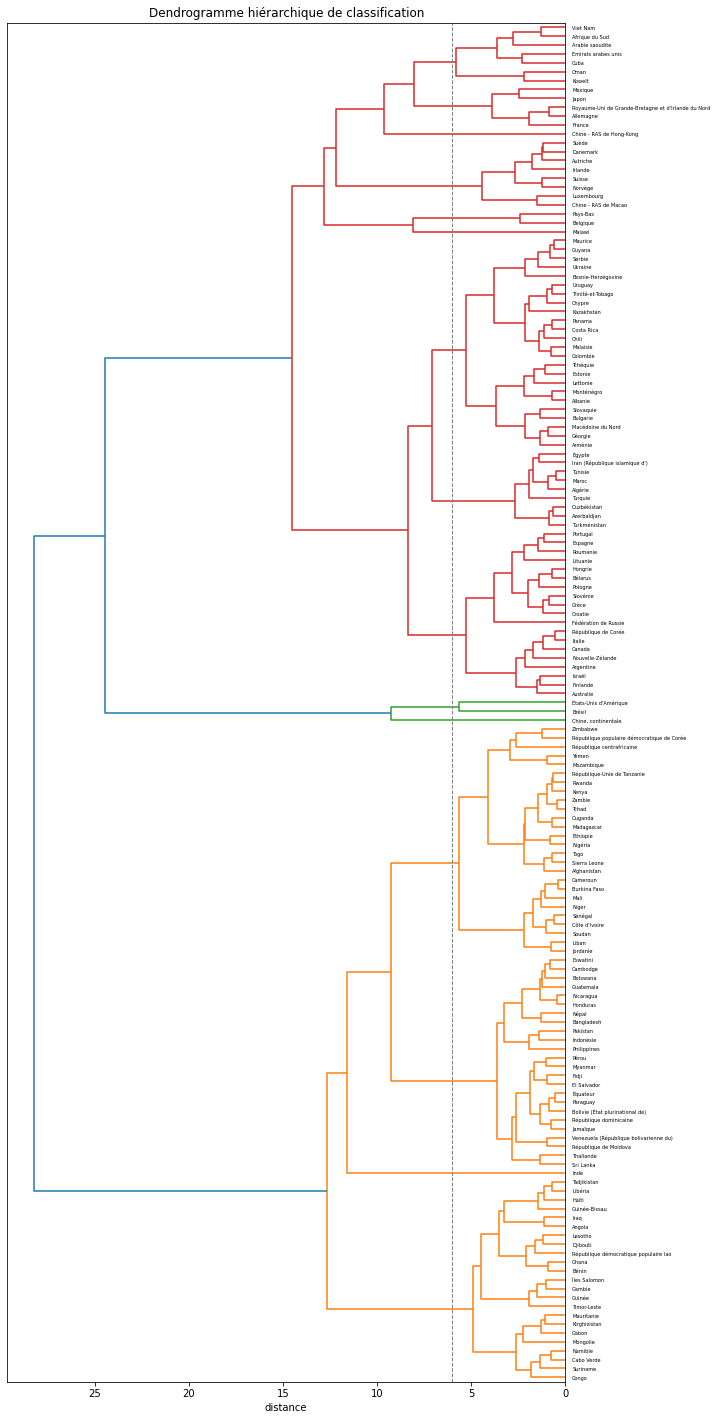

In [92]:
# Préparation des données pour le clustering
X = df.values
names_pays = df.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')


# Affichage du dendrogramme
plt.figure(figsize=(10,25))
sns.set_palette('tab10')
dendrogram(Z,
        labels = names_pays,
        orientation = "left", color_threshold=15)
plt.axvline(x=6, c='grey', lw=1, linestyle='dashed')

plt.title('Dendrogramme hiérarchique de classification')
plt.xlabel('distance')

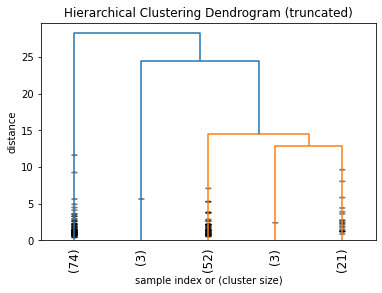

In [93]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

# <font color = 'orange'> 6. Clustering </font>


### 📌6.1 fcluster

In [94]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
pays = pd.DataFrame({"Zone": names_pays, "cluster": clusters})
pays = pays.sort_values(['cluster', 'Zone'])
pays

,Zone,cluster
0,Afghanistan,1
5,Angola,1
12,Bangladesh,1
14,Bolivie (État plurinational de),1
16,Botswana,1
...,...,...
111,Royaume-Uni de Grande-Bretagne et d'Irlande du...,5
126,Suisse,5
128,Suède,5
143,Viet Nam,5


In [95]:
pays.cluster.value_counts()

1    74
3    52
5    21
2     3
4     3
Name: cluster, dtype: int64

In [96]:
#Jointure df et df cluster
df_cluster = pd.merge(df,pays, on='Zone', how='inner')
#df_cluster.set_index('cluster',inplace=True)
df_cluster

,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol,cluster
0,Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807,1
1,Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200,5
2,Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939,3
3,Algérie,3340.0,92.81,28.779226,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368,3
4,Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Émirats arabes unis,3341.0,112.79,45.695540,9487203.0,3.642876,40644.804043,480000.0,465000.0,47000.0,96.875000,9.791667,5
149,Équateur,2597.0,66.46,46.403852,16785361.0,7.811926,6213.501276,340000.0,0.0,340000.0,0.000000,100.000000,1
150,États-Unis d'Amérique,3774.0,113.10,64.809903,325084756.0,3.396305,60116.568493,18305000.0,123000.0,21914000.0,0.671948,119.715925,2
151,Éthiopie,2332.0,66.23,9.995470,106399924.0,12.850516,721.753494,72000.0,1000.0,71000.0,1.388889,98.611111,1


In [97]:
#sns.pairplot(df_cluster, hue = 'cluster')


### 📌6.2 K-mean

In [98]:
# Nombre de clusters souhaités
n_clust = 5
# import de l'échantillon
data = df
# préparation des données pour le clustering
X = data.values
# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [99]:
# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

KMeans(n_clusters=5)

In [100]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
clusters

array([2, 4, 4, 4, 1, 0, 1, 4, 4, 1, 1, 4, 2, 1, 2, 4, 2, 3, 4, 2, 4, 0,
       0, 2, 2, 1, 4, 1, 1, 3, 4, 4, 0, 4, 4, 4, 2, 1, 0, 4, 4, 4, 2, 4,
       1, 1, 4, 0, 0, 0, 4, 2, 0, 0, 4, 4, 0, 2, 4, 2, 2, 4, 0, 1, 1, 4,
       4, 1, 2, 4, 2, 0, 1, 0, 4, 2, 0, 4, 1, 4, 2, 4, 2, 2, 4, 4, 0, 1,
       0, 4, 2, 4, 0, 2, 2, 2, 1, 4, 2, 0, 2, 4, 2, 4, 2, 1, 2, 4, 4, 4,
       4, 1, 2, 2, 4, 4, 4, 0, 2, 2, 4, 2, 4, 4, 2, 2, 1, 0, 1, 2, 0, 2,
       4, 4, 0, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 1, 2, 3, 2, 0])

In [101]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=6).fit(X)
X_projected = pca.transform(X)
X_projected

array([[-1.16966408e+07, -8.75980895e+05,  5.39548908e+04,
        -3.39766413e+04, -1.02794992e+04, -6.09729391e+02],
       [ 9.05175427e+06,  1.41422852e+06, -6.18983955e+05,
         9.11255071e+04, -1.80103317e+04,  2.20544513e+01],
       [-4.51056385e+07, -4.31630138e+05,  4.51048286e+04,
        -4.91086549e+04, -6.64414717e+03,  6.71321349e+02],
       [-6.59891922e+06, -5.83379054e+05,  5.90830626e+04,
        -6.72732148e+04, -5.87383778e+03,  6.32444499e+02],
       [ 3.46909663e+07,  5.81582181e+05, -4.91671444e+05,
         5.58491455e+05,  6.69275267e+03,  8.70777581e+01],
       [-1.81729344e+07, -6.23812777e+05, -2.39849414e+05,
         7.63242232e+04, -1.34214771e+04, -3.98302029e+02],
       [-1.48742884e+07,  3.41114605e+05, -8.16928749e+05,
         2.60269352e+05, -9.39439383e+03,  1.79204652e+02],
       [-4.01598203e+06,  1.87470931e+06,  1.01812596e+04,
        -1.23528722e+05,  2.54235763e+03,  3.45833790e+02],
       [-4.50449253e+07, -4.26137176e+05,  2.846

C:\Users\pouri\AppData\Local\Temp/ipykernel_9684/1400338993.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet')


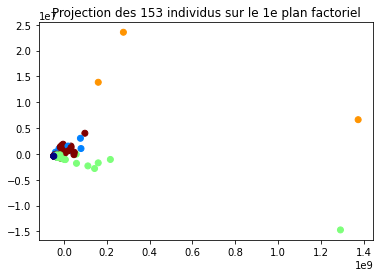

In [102]:
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet')
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

C:\Users\pouri\AppData\Local\Temp/ipykernel_9684/2099868582.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 2], X_projected[:, 3], c=clusters.astype(np.float), cmap = 'jet')


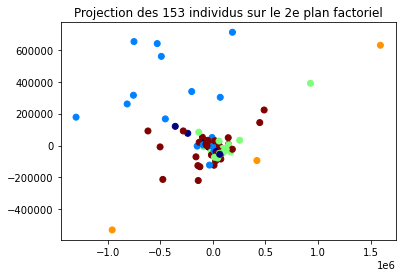

In [103]:
plt.scatter(X_projected[:, 2], X_projected[:, 3], c=clusters.astype(np.float), cmap = 'jet')
plt.title("Projection des {} individus sur le 2e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

C:\Users\pouri\AppData\Local\Temp/ipykernel_9684/781743668.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 4], X_projected[:, 5], c=clusters.astype(np.float), cmap = 'jet')


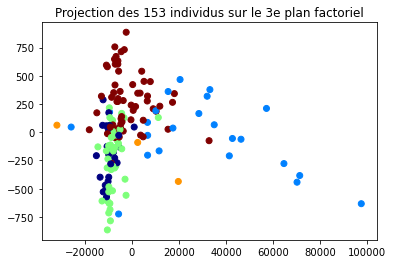

In [104]:
plt.scatter(X_projected[:, 4], X_projected[:, 5], c=clusters.astype(np.float), cmap = 'jet')
plt.title("Projection des {} individus sur le 3e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [105]:
X_projected

array([[-1.16966408e+07, -8.75980895e+05,  5.39548908e+04,
        -3.39766413e+04, -1.02794992e+04, -6.09729391e+02],
       [ 9.05175427e+06,  1.41422852e+06, -6.18983955e+05,
         9.11255071e+04, -1.80103317e+04,  2.20544513e+01],
       [-4.51056385e+07, -4.31630138e+05,  4.51048286e+04,
        -4.91086549e+04, -6.64414717e+03,  6.71321349e+02],
       [-6.59891922e+06, -5.83379054e+05,  5.90830626e+04,
        -6.72732148e+04, -5.87383778e+03,  6.32444499e+02],
       [ 3.46909663e+07,  5.81582181e+05, -4.91671444e+05,
         5.58491455e+05,  6.69275267e+03,  8.70777581e+01],
       [-1.81729344e+07, -6.23812777e+05, -2.39849414e+05,
         7.63242232e+04, -1.34214771e+04, -3.98302029e+02],
       [-1.48742884e+07,  3.41114605e+05, -8.16928749e+05,
         2.60269352e+05, -9.39439383e+03,  1.79204652e+02],
       [-4.01598203e+06,  1.87470931e+06,  1.01812596e+04,
        -1.23528722e+05,  2.54235763e+03,  3.45833790e+02],
       [-4.50449253e+07, -4.26137176e+05,  2.846

# <font color = 'orange'> 6. Analyse en Composantes Principales(ACP) </font>


In [106]:
from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [107]:
# choix du nombre de composantes à calculer
n_comp = 10

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[['kcal_hab', 'kprot_hab', 'proportion_prot_total_anim', 'pop_2017',
       'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol', 'Importations_vol',
       'Production_vol', 'dep_import_vol', 'autosuff_vol']]

In [108]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
#names = data["idCours"] # ou data.index pour avoir les intitulés
features = df.columns
list_pays = df_cluster.Zone
list_group = df_cluster.cluster

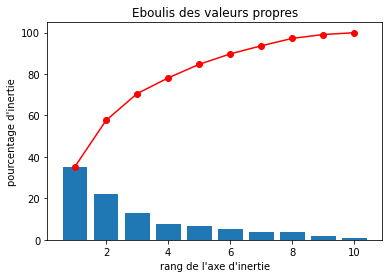

In [109]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)



In [110]:
pcs = pca.components_
pcs

array([[ 0.43820131,  0.44399458,  0.41521008,  0.1256883 , -0.30320629,
         0.36111799,  0.26285896,  0.22905354,  0.26014287,  0.02542531,
         0.10212783],
       [-0.13797125, -0.17026369, -0.22179434,  0.50110162,  0.09537525,
        -0.20612498,  0.51304135, -0.00939834,  0.50626526, -0.26324426,
         0.10579648],
       [-0.10612634, -0.05928938, -0.01718823,  0.11305624,  0.30218614,
         0.08797377,  0.13995987,  0.44757942,  0.09937156,  0.596815  ,
        -0.53582649],
       [-0.14213167, -0.14338767, -0.10362704,  0.03083626, -0.13907791,
        -0.11688153, -0.08812546,  0.60685326, -0.10323346,  0.23826611,
         0.6863529 ],
       [ 0.11915971,  0.07871853, -0.1281789 , -0.11198928,  0.76966856,
         0.48735173,  0.00127297,  0.03137968,  0.01429134, -0.17188877,
         0.29999204],
       [ 0.18876236,  0.14306661, -0.1522264 , -0.04712359,  0.03801051,
        -0.22925769, -0.08178183,  0.58526672, -0.17898003, -0.61463734,
        -0.324

In [126]:
features

Index(['kcal_hab', 'kprot_hab', 'proportion_prot_total_anim', 'pop_2017',
       'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol', 'Importations_vol',
       'Production_vol', 'dep_import_vol', 'autosuff_vol'],
      dtype='object')

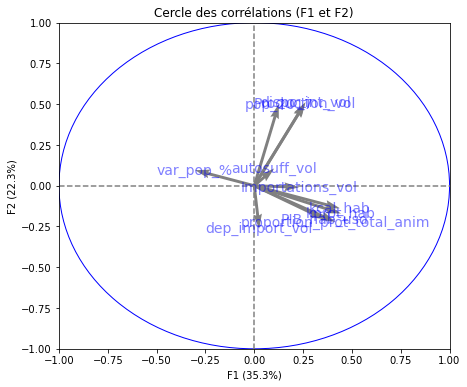

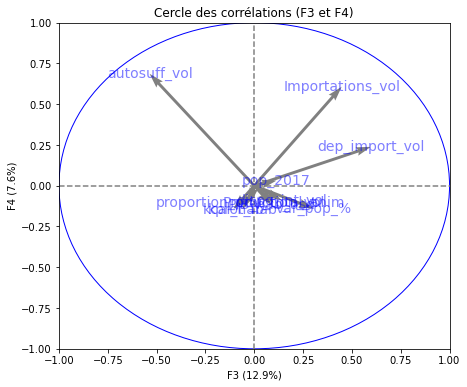

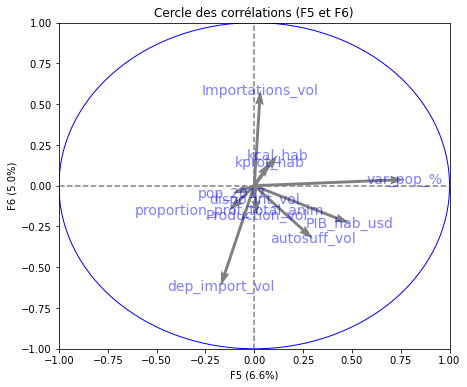

In [111]:
# Cercle des corrélations
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

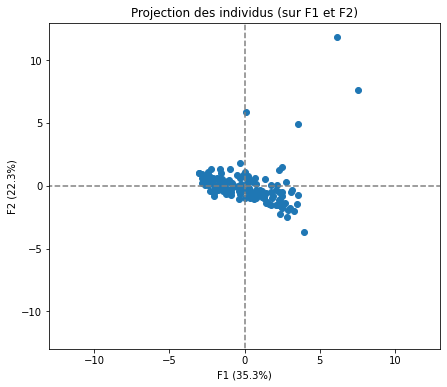

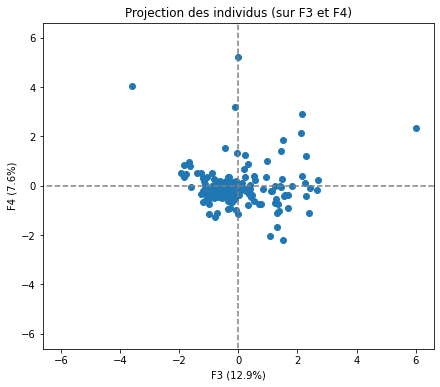

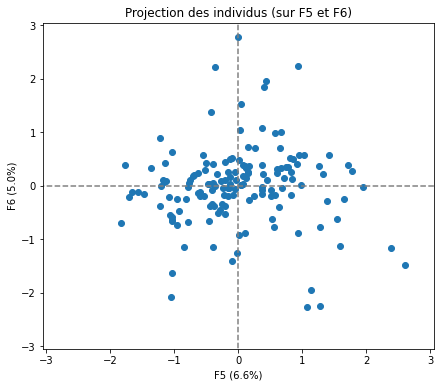

In [112]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])
plt.show()


# <font color = 'orange'> 7. Visualisation </font>


Text(0.5, 1.0, 'Variation (%) population 2012-2017')

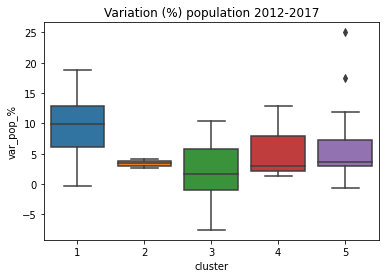

In [113]:
sns.boxplot(x='cluster', y='var_pop_%', data = df_cluster )
plt.title('Variation (%) population 2012-2017')

Text(0.5, 1.0, 'PIB par habitant')

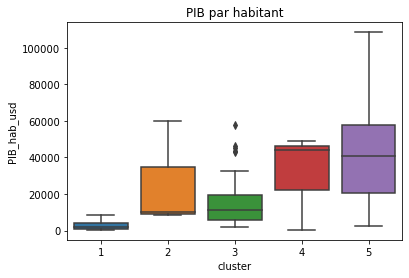

In [114]:
sns.boxplot(x='cluster', y='PIB_hab_usd', data = df_cluster )
plt.title('PIB par habitant')

Text(0.5, 1.0, 'Disponibilité alimentaire(kcal/hab/jour)')

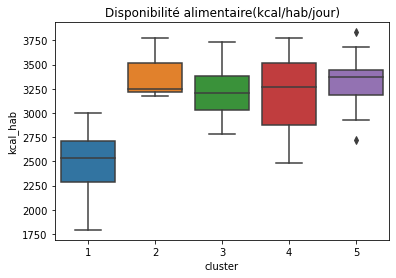

In [115]:
sns.boxplot(x='cluster', y='kcal_hab', data = df_cluster )
plt.title('Disponibilité alimentaire(kcal/hab/jour)')

Text(0.5, 1.0, 'Disponibilité alimentaire en protéine (g/hab/jour)')

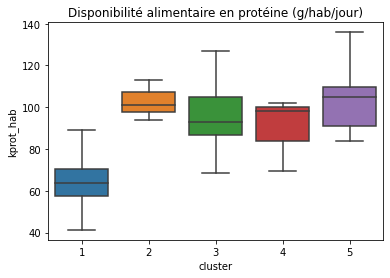

In [116]:
sns.boxplot(x='cluster', y='kprot_hab', data = df_cluster )
plt.title('Disponibilité alimentaire en protéine (g/hab/jour)')

Text(0.5, 1.0, "Part des protéine d'origine animale(%)")

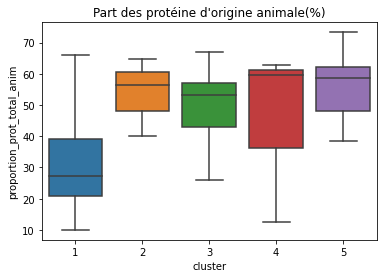

In [117]:
sns.boxplot(x='cluster', y='proportion_prot_total_anim', data = df_cluster )
plt.title("Part des protéine d'origine animale(%)")

Text(0.5, 1.0, 'taux de dépendance aux importations de viandes volailles')

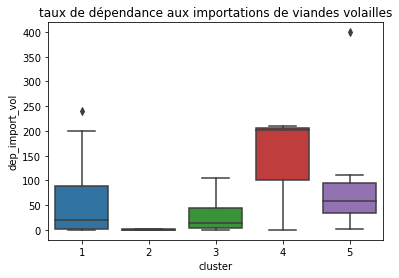

In [118]:
sns.boxplot(x='cluster', y='dep_import_vol', data = df_cluster )
plt.title("taux de dépendance aux importations de viandes volailles")

Text(0.5, 1.0, "taux d'autosuffisance en viandes volailles")

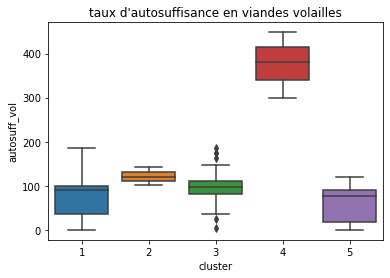

In [119]:
sns.boxplot(x='cluster', y='autosuff_vol', data = df_cluster )
plt.title("taux d'autosuffisance en viandes volailles")

11


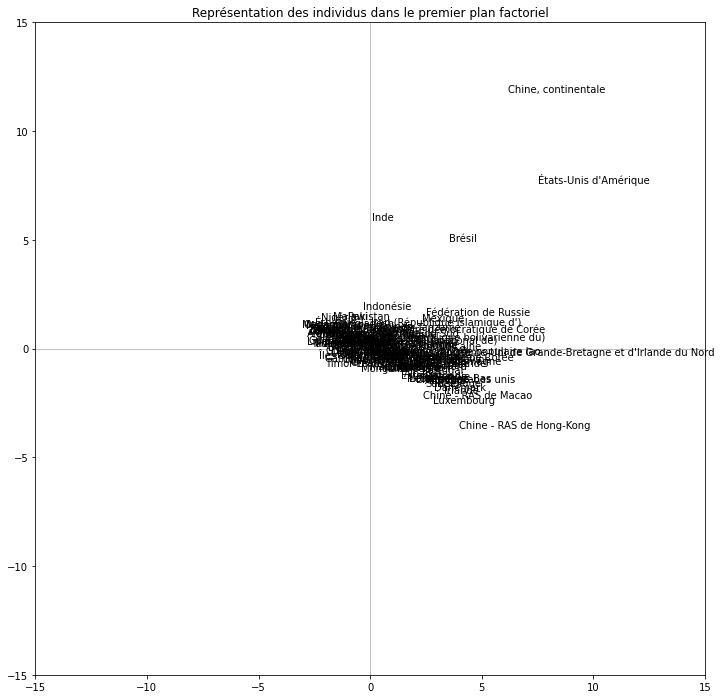

In [120]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

n = df.shape[0]

#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)

#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 11

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-15,15) #même limites en abscisse
axes.set_ylim(-15,15) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    #ajouter les axes
    plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)
#affichage
plt.title('Représentation des individus dans le premier plan factoriel')
plt.show()

In [121]:
df = df_cluster
 
n_components = 6
 
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[['kcal_hab', 'kprot_hab', 'proportion_prot_total_anim', 'pop_2017',
       'var_pop_%', 'PIB_hab_usd', 'dispo_int_vol', 'Importations_vol',
       'Production_vol', 'dep_import_vol', 'autosuff_vol']])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

display(df.head())



,Zone,kcal_hab,kprot_hab,proportion_prot_total_anim,pop_2017,var_pop_%,PIB_hab_usd,dispo_int_vol,Importations_vol,Production_vol,dep_import_vol,autosuff_vol,cluster,PC1,PC2,PC3,PC4,PC5,PC6
0,Afghanistan,2048.0,56.18,19.829121,36296113.0,14.146796,513.085978,57000.0,29000.0,28000.0,50.877193,49.122807,1,-1.169664e+07,-8.759809e+05,53954.890825,-33976.641279,-10279.499186,-609.729391
1,Afrique du Sud,2934.0,83.62,42.202822,57009756.0,7.326988,6121.876572,2116000.0,514000.0,1665000.0,24.291115,78.686200,5,9.051754e+06,1.414229e+06,-618983.955221,91125.507142,-18010.331701,22.054451
2,Albanie,3389.0,118.12,54.249915,2884169.0,-1.037630,4514.204908,33000.0,20000.0,13000.0,60.606061,39.393939,3,-4.510564e+07,-4.316301e+05,45104.828595,-49108.654890,-6644.147171,671.321349
3,Algérie,3340.0,92.81,28.779226,41389189.0,9.677150,4109.701336,304000.0,2000.0,297000.0,0.657895,97.697368,3,-6.598919e+06,-5.833791e+05,59083.062593,-67273.214817,-5873.837782,632.444499
4,Allemagne,3545.0,103.82,60.460412,82658409.0,2.039455,44552.061000,1557000.0,842000.0,1514000.0,54.078356,97.238279,5,3.469097e+07,5.815822e+05,-491671.443784,558491.454926,6692.752675,87.077758


In [122]:
pca.explained_variance_ratio_

array([9.99717809e-01, 2.78498717e-04, 2.80833060e-06, 8.71269608e-07,
       1.27898598e-08, 4.83096949e-12])

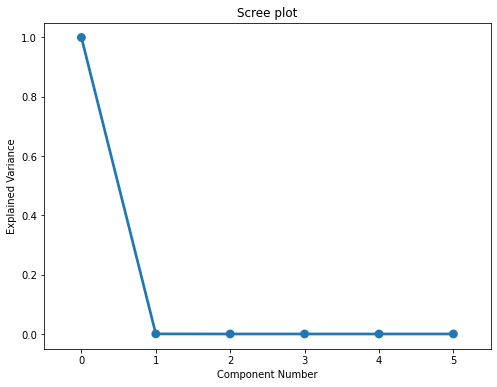

In [123]:
# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()



C:\Users\pouri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pouri\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


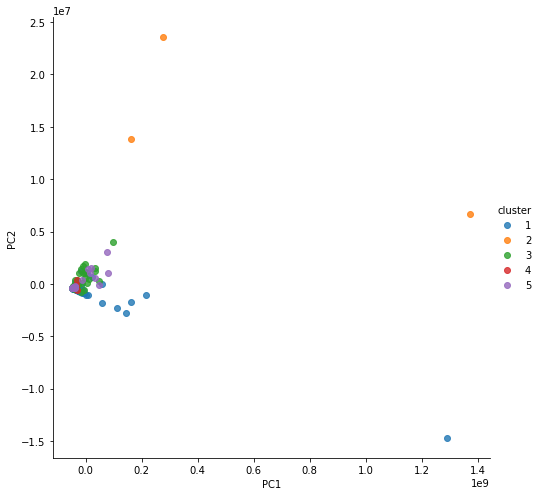

In [124]:
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               hue='cluster', data=df,
               fit_reg=False,
               scatter=True,
               size=7)
plt.show()



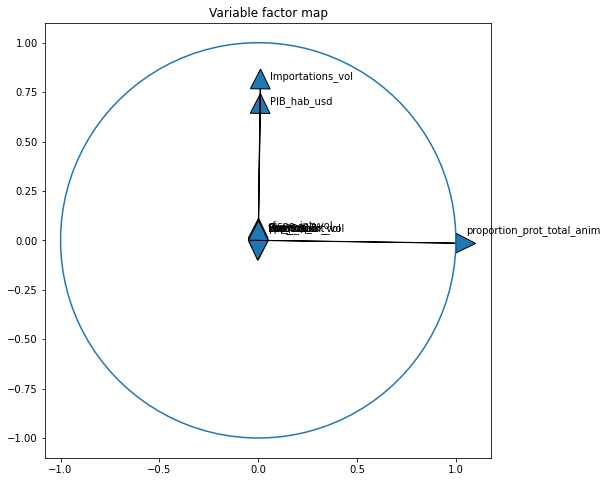

In [125]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()